In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
import os

In [3]:
#os.chdir("F:\\Practice\\Machine Learning and Deep Learning\\Classes\\Assignment\\Kaggle\\2nd")

In [4]:
#df=pd.read_csv("breast-cancer-wisconsin-data.zip")
df = pd.read_csv("../input/data.csv")

In [5]:
df.shape

(569, 33)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df['diagnosis'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Name: diagnosis, Length: 569, dtype: bool

In [10]:
y=df['diagnosis']

In [11]:
y

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
x=df.loc[:,'radius_mean':'fractal_dimension_worst']

In [13]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [14]:
x.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
df = df.drop(["id", "Unnamed: 32"], axis=1)

In [16]:
df.shape

(569, 31)

In [17]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
y=y.map({'M':0,'B':1})

In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [20]:
scale=ss()

In [21]:
x=scale.fit_transform(x)

In [22]:
x.shape

(569, 30)

In [23]:
y.shape

(569,)

In [24]:
pca=PCA()

In [25]:
out=pca.fit_transform(x)

In [26]:
out.shape

(569, 30)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True )

In [36]:
dt = DecisionTreeClassifier()

In [37]:
rf = RandomForestClassifier(n_estimators=100)

In [38]:
etc = ExtraTreesClassifier(n_estimators=100)

In [39]:
gbm = GradientBoostingClassifier()

In [40]:
knc = KNeighborsClassifier()

In [41]:
xg = XGBClassifier()

In [42]:
#Train data

In [43]:
dt1 = dt.fit(x_train,y_train)

In [44]:
rf1 = rf.fit(x_train,y_train)
etc1 = etc.fit(x_train,y_train)
gbm1 = gbm.fit(x_train,y_train)
knc1 = knc.fit(x_train,y_train)
xg1 = xg.fit(x_train,y_train)

In [45]:
#predictions

In [46]:
y_pred_dt = dt1.predict(x_test)

In [47]:
y_pred_rf = rf1.predict(x_test)
y_pred_etc= etc1.predict(x_test)
y_pred_gbm= gbm1.predict(x_test)
y_pred_knc= knc1.predict(x_test)
y_pred_xg= xg1.predict(x_test)

In [48]:
#probability value

In [49]:
y_pred_dt_prob = dt1.predict_proba(x_test)

In [50]:
y_pred_rf_prob = rf1.predict_proba(x_test)

In [51]:
y_pred_etc_prob = etc1.predict_proba(x_test)
y_pred_gbm_prob= gbm1.predict_proba(x_test)
y_pred_knc_prob = knc1.predict_proba(x_test)
y_pred_xg_prob = xg1.predict_proba(x_test)

In [52]:
#accuracy

In [53]:
accuracy_score(y_test,y_pred_dt)

0.9064327485380117

In [54]:
accuracy_score(y_test,y_pred_rf)

0.9590643274853801

In [55]:
accuracy_score(y_test,y_pred_etc)

0.9649122807017544

In [56]:
accuracy_score(y_test,y_pred_knc)

0.9649122807017544

In [57]:
accuracy_score(y_test,y_pred_xg)

0.9649122807017544

In [58]:
accuracy_score(y_test,y_pred_gbm)

0.9707602339181286

In [59]:
#Confusion Matrix

In [60]:
confusion_matrix(y_test,y_pred_dt)

array([[58,  8],
       [ 8, 97]], dtype=int64)

In [61]:
confusion_matrix(y_test,y_pred_rf)

array([[ 62,   4],
       [  3, 102]], dtype=int64)

In [62]:
confusion_matrix(y_test,y_pred_etc)

array([[ 62,   4],
       [  2, 103]], dtype=int64)

In [63]:
confusion_matrix(y_test,y_pred_gbm)

array([[ 62,   4],
       [  1, 104]], dtype=int64)

In [64]:
confusion_matrix(y_test,y_pred_knc)

array([[ 61,   5],
       [  1, 104]], dtype=int64)

In [65]:
confusion_matrix(y_test,y_pred_xg)

array([[ 62,   4],
       [  2, 103]], dtype=int64)

In [66]:
#ROC

In [67]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt_prob[: , 1], pos_label= 1)

In [68]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf_prob[: , 1], pos_label= 1)
fpr_etc, tpr_etc, thresholds = roc_curve(y_test, y_pred_etc_prob[: , 1], pos_label= 1)

In [69]:
fpr_knc, tpr_knc, thresholds = roc_curve(y_test, y_pred_gbm_prob[: , 1], pos_label= 1)
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_xg_prob[: , 1], pos_label= 1)
fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test, y_pred_gbm_prob[: , 1], pos_label= 1)

In [70]:
#AUC values

In [71]:
auc(fpr_dt,tpr_dt)

0.9012987012987014

In [72]:
auc(fpr_rf,tpr_rf)

0.9888167388167388

In [73]:
auc(fpr_etc,tpr_etc)

0.9858585858585858

In [74]:
auc(fpr_knc,tpr_knc)

0.9933621933621933

In [75]:
auc(fpr_xg,tpr_xg)

0.9956709956709957

In [76]:
auc(fpr_gbm,tpr_gbm)

0.9933621933621933

In [77]:
#Precision/Recall/F-score

In [78]:
precision_recall_fscore_support(y_test,y_pred_dt)

(array([0.87878788, 0.92380952]),
 array([0.87878788, 0.92380952]),
 array([0.87878788, 0.92380952]),
 array([ 66, 105], dtype=int64))

In [79]:
precision_recall_fscore_support(y_test,y_pred_rf)

(array([0.95384615, 0.96226415]),
 array([0.93939394, 0.97142857]),
 array([0.94656489, 0.96682464]),
 array([ 66, 105], dtype=int64))

In [80]:
precision_recall_fscore_support(y_test,y_pred_etc)

(array([0.96875   , 0.96261682]),
 array([0.93939394, 0.98095238]),
 array([0.95384615, 0.97169811]),
 array([ 66, 105], dtype=int64))

In [81]:
precision_recall_fscore_support(y_test,y_pred_knc)

(array([0.98387097, 0.95412844]),
 array([0.92424242, 0.99047619]),
 array([0.953125  , 0.97196262]),
 array([ 66, 105], dtype=int64))

In [82]:
precision_recall_fscore_support(y_test,y_pred_xg)

(array([0.96875   , 0.96261682]),
 array([0.93939394, 0.98095238]),
 array([0.95384615, 0.97169811]),
 array([ 66, 105], dtype=int64))

In [83]:
precision_recall_fscore_support(y_test,y_pred_gbm)

(array([0.98412698, 0.96296296]),
 array([0.93939394, 0.99047619]),
 array([0.96124031, 0.97652582]),
 array([ 66, 105], dtype=int64))

In [84]:
# ROC curve 

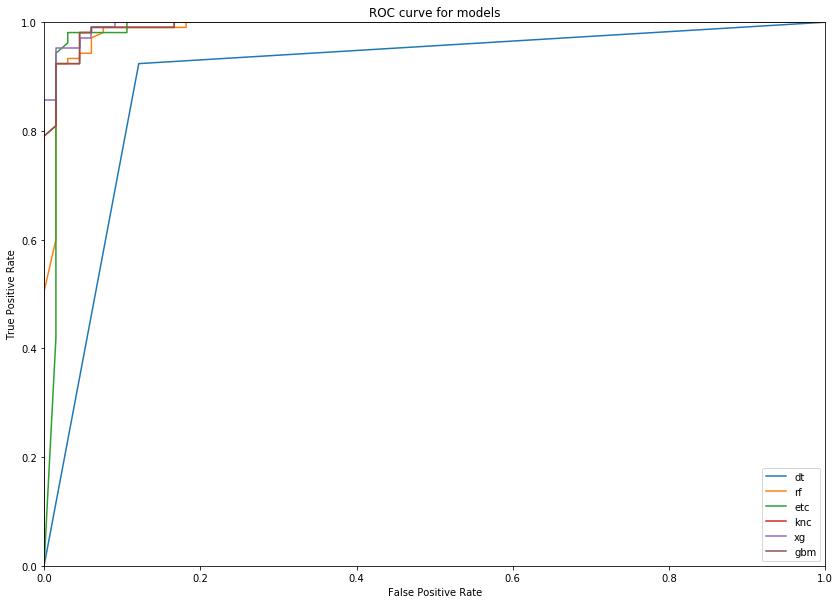

In [93]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_etc, tpr_etc, label = "etc")
ax.plot(fpr_knc, tpr_knc, label = "knc")
ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")
ax.legend(loc="lower right")
plt.show()